## Project Name = CUSTOMER CHURN ANALYSIS

### Author :- SHIV CHETAN KUMAWAT

## IMPORT LIBRARIES 

In [96]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## IMPORT DATA

In [97]:
df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## DATA CLEANING 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [99]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
df.isnull().sum().sum()

np.int64(0)

In [102]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [103]:
df['customerID'].duplicated().sum()

np.int64(0)

In [104]:
def conv(value):
    if value == 1:
        return 'yes'
    else :
        return 'no'

#### Convert 0 and 1 values of senior citizen to yes/no to make it easier to understand 

In [105]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

## EXPLORATORY DATA ANALYSIS (EDA)

#### Count of Customer by Churn

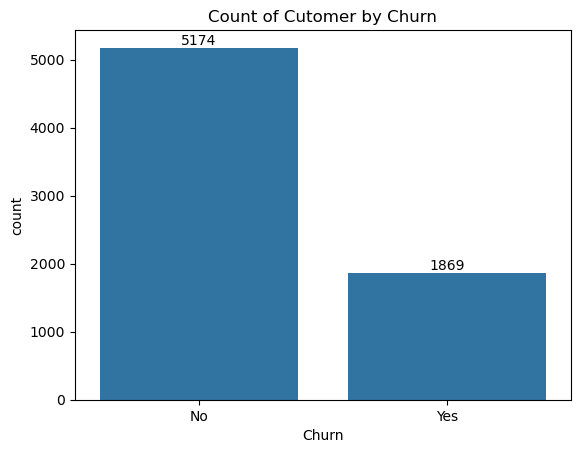

In [106]:
ax = sns.countplot(data = df,x = 'Churn')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Cutomer by Churn')
plt.show()

#### Percentage of Churned Customer

In [107]:
count_churn = df.groupby(['Churn'],as_index = False)['customerID'].count()
count_churn

,Churn,customerID
0,No,5174
1,Yes,1869


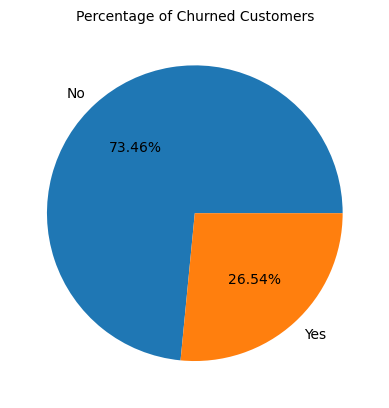

In [108]:
plt.pie(count_churn['customerID'],labels = count_churn['Churn'],autopct = '%1.2f%%')
plt.title("Percentage of Churned Customers",fontsize = 10)
plt.show()

##### from the given pie chart we can conclude 26.54% of our customers have churned out.
##### not let's explore the reason behind it.

#### Churn by Gender 

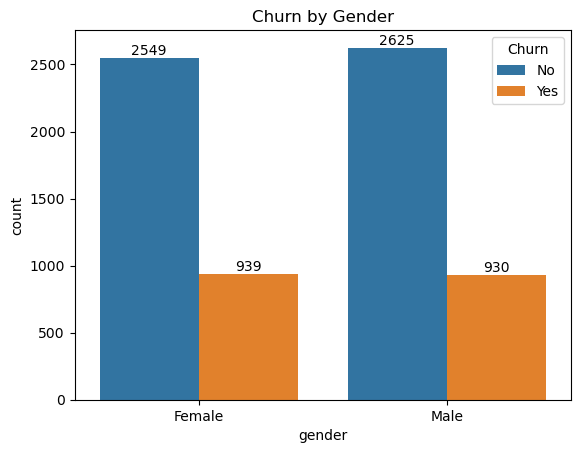

In [109]:
ax = sns.countplot(data = df , x= 'gender',hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Churn by Gender')
plt.show()

#### Count of customer by Senior citizen

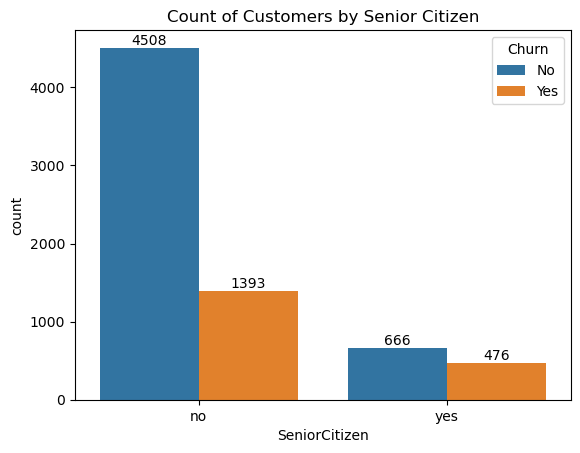

In [110]:
ax = sns.countplot(data = df, x ='SeniorCitizen',hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Customers by Senior Citizen')
plt.show()

#### Percentaege of Senior Citizen by Churn (Stack Bar Chart)

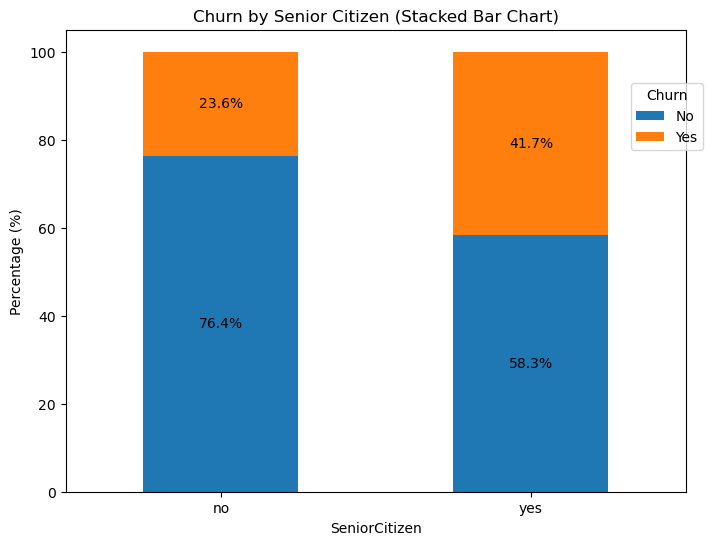

In [111]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

####  Count of Customer by Tenure 

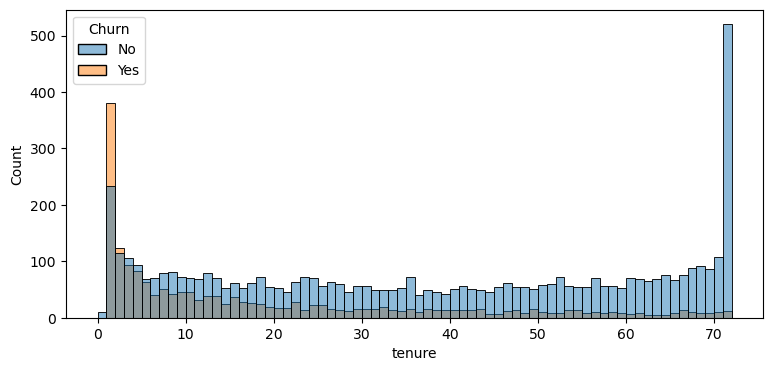

In [112]:
plt.figure(figsize = (9,4))
sns.histplot(x='tenure', data = df, bins = 72 , hue = 'Churn')
plt.show()

##### -people who have used our services for a long time have stayed and people who have used our sevices
##### 1 or 2 months  have churned.

#### Count of Customer by Contract 

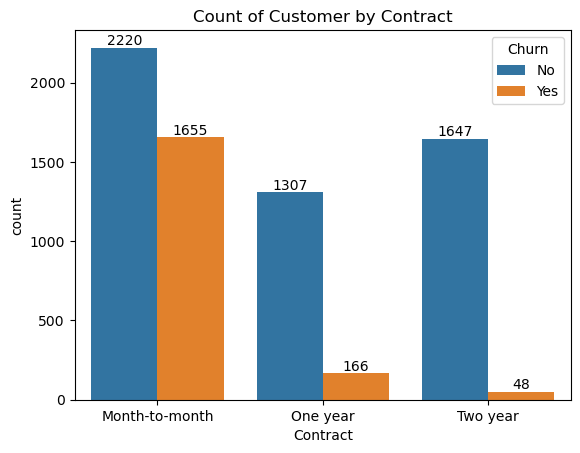

In [113]:
ax = sns.countplot(data = df ,x = 'Contract',hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count of Customer by Contract')
plt.show()

##### -people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [114]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'Online Backup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

#### Count Plot for Phone Service

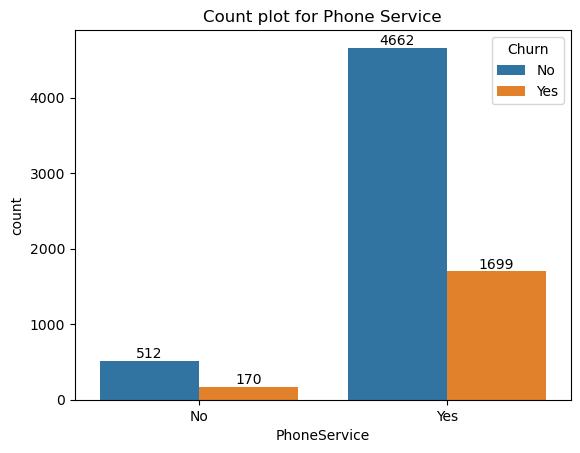

In [115]:
ax =sns.countplot(data = df,x = 'PhoneService' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Phone Service')
plt.show()

#### Count plot for Multiple Lines

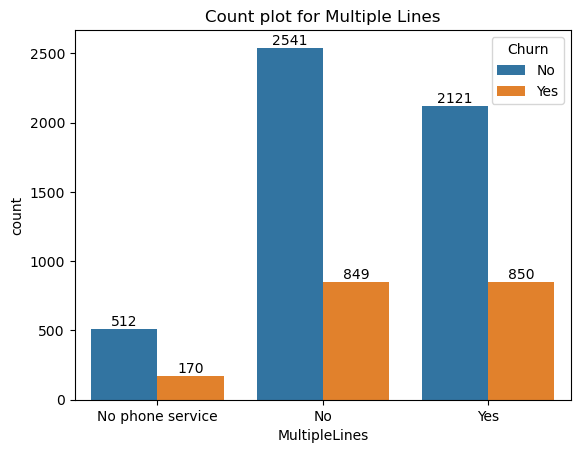

In [116]:
ax =sns.countplot(data = df,x = 'MultipleLines' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Multiple Lines')
plt.show()

#### Count plot for Online Security

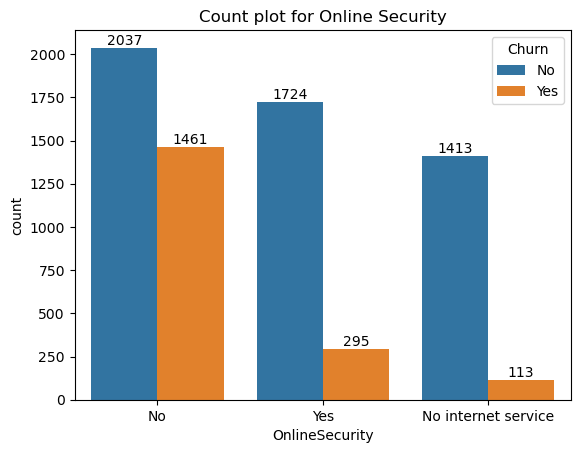

In [117]:
ax =sns.countplot(data = df,x = 'OnlineSecurity' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Online Security')
plt.show()

#### Count plot for Internet Service

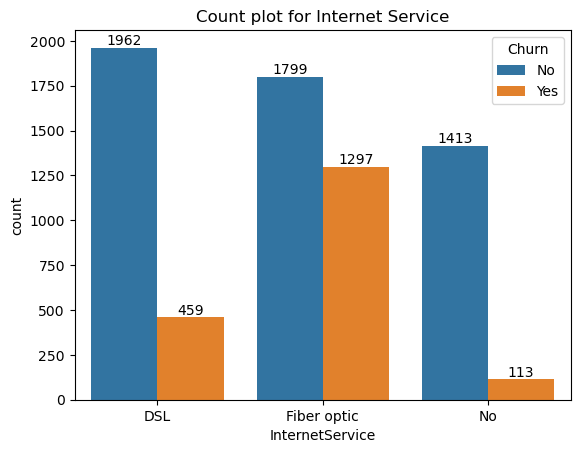

In [118]:
ax =sns.countplot(data = df,x = 'InternetService' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Internet Service')
plt.show()

#### Count plot for Online Backup

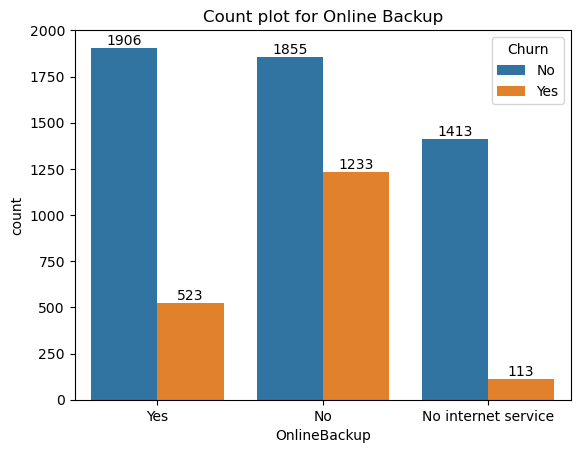

In [119]:
ax =sns.countplot(data = df,x = 'OnlineBackup' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Online Backup')
plt.show()

#### Count plot for Device Protection

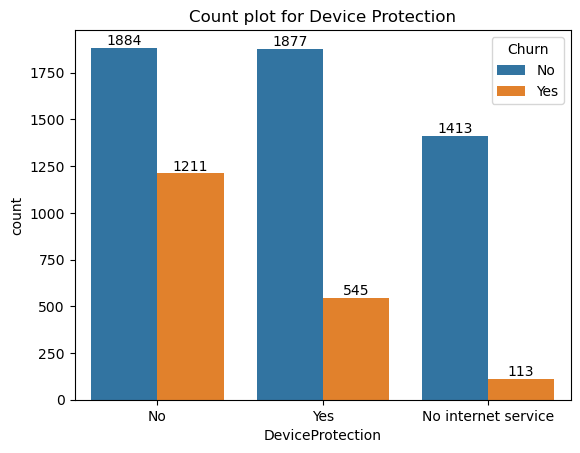

In [120]:
ax =sns.countplot(data = df,x = 'DeviceProtection' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Device Protection')
plt.show()

#### Count plot for Tech Support

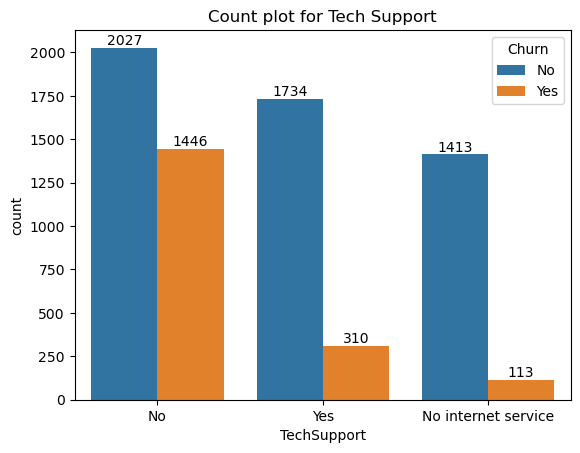

In [121]:
ax =sns.countplot(data = df,x = 'TechSupport' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Tech Support')
plt.show()

#### Count plot for Streaming TV

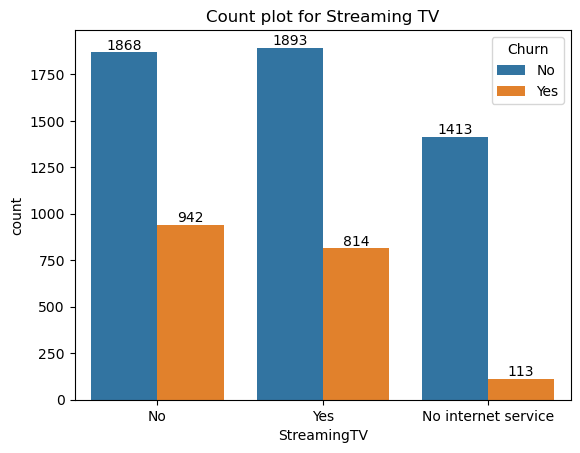

In [122]:
ax =sns.countplot(data = df,x = 'StreamingTV' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Streaming TV')
plt.show()

#### Count plot for Streaming Movies

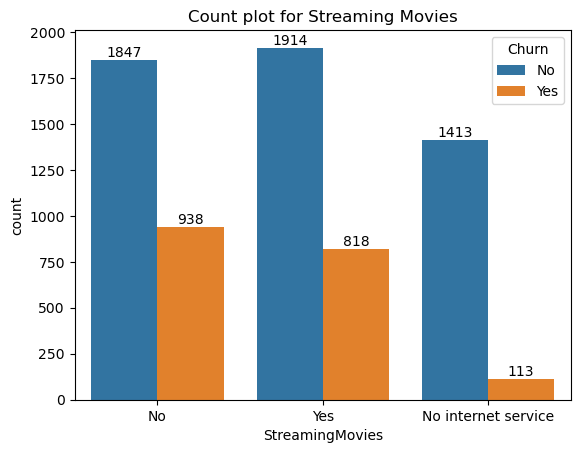

In [123]:
ax =sns.countplot(data = df,x = 'StreamingMovies' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Streaming Movies')
plt.show()

### ALL SERVICES COUNTPLOT

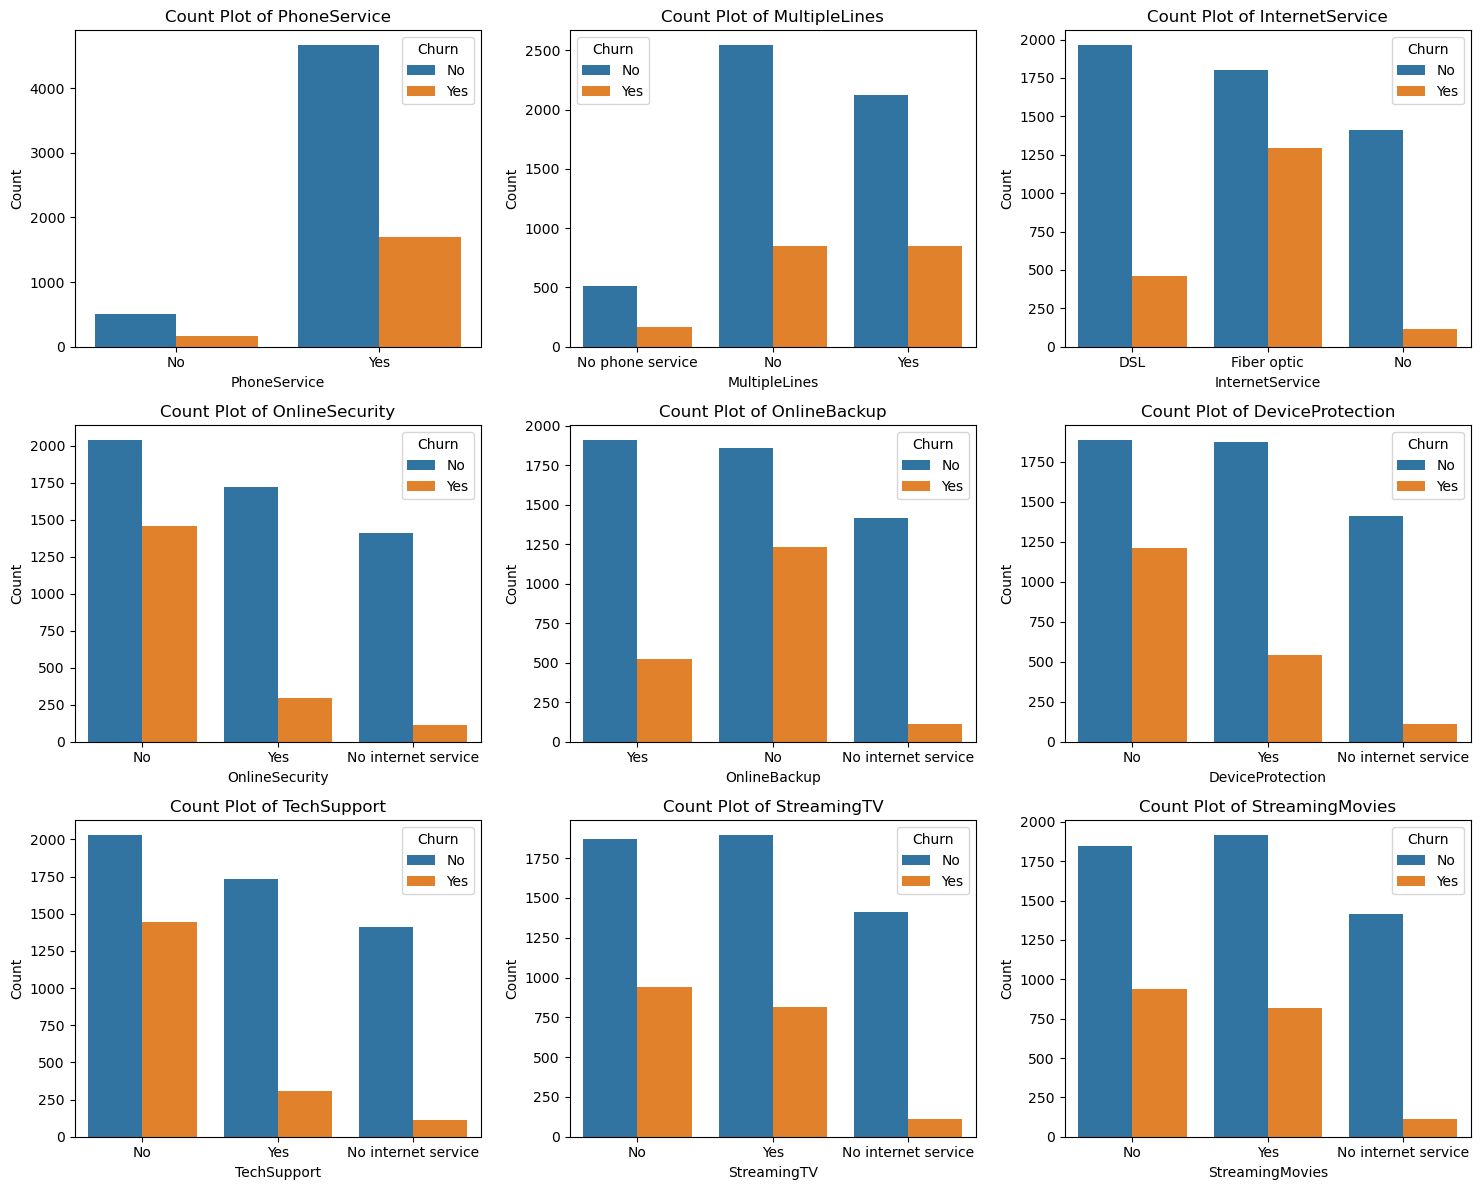

In [124]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

#### Count plot for Payment Method

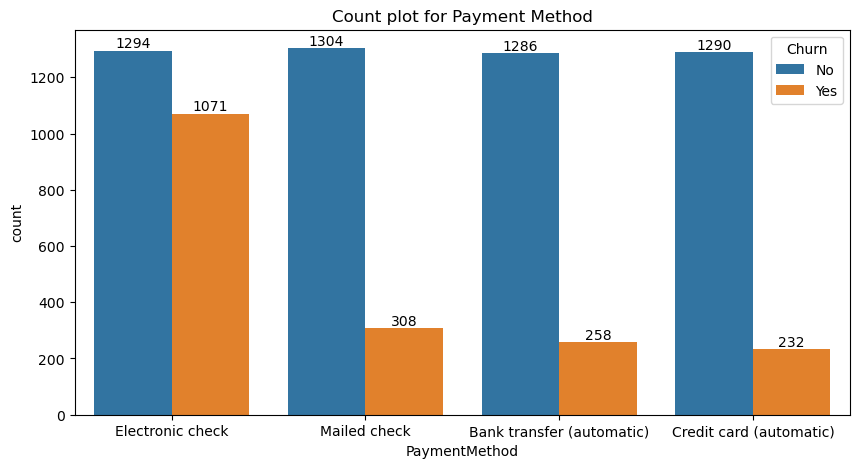

In [125]:
plt.figure(figsize = (10,5))
ax =sns.countplot(data = df,x = 'PaymentMethod' , hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Count plot for Payment Method')
plt.show()

customer is likely to churn when he is using electronic check as a payment method. 